Prueba

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import joblib
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')
print(df.columns)

Index(['Consumo_T', 'cafetera', 'esmeril', 'licuadora', 'microondas'], dtype='object')


    Consumo_T  Consumo_cafetera_Pred  Consumo_esmeril_Pred  \
0    4.248523               0.000000              3.384066   
1    2.553571               0.049477              0.477310   
2    4.326631               0.000000              3.384066   
3    4.729704               0.000000              3.273664   
4    3.555526               0.000000              3.384066   
..        ...                    ...                   ...   
95   3.431554               0.000000              3.384066   
96   4.782826               1.740223              1.851322   
97   4.422297               0.000000              3.384066   
98   1.201223               0.000000              0.000000   
99   1.126377               0.000000              0.000000   

    Consumo_licuadora_Pred  Consumo_microondas_Pred  
0                 0.000000                 0.000000  
1                 0.000000                 2.026784  
2                 0.000000                 0.000000  
3                 0.000000             

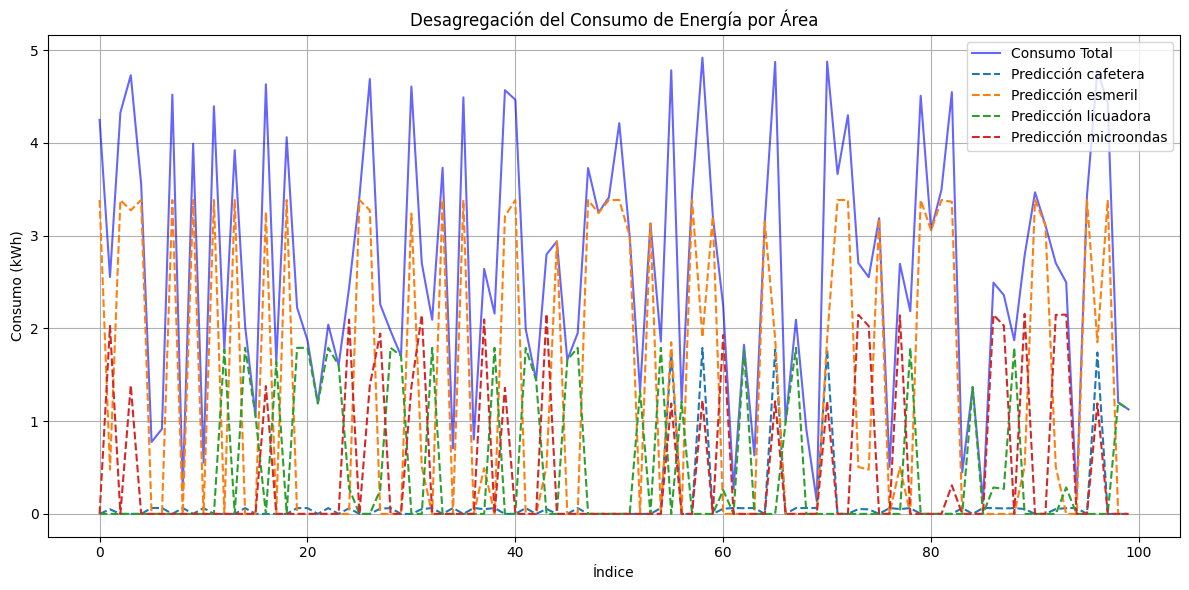

In [2]:




# Preparar los datos para el modelo
X = df[['Consumo_T']]  # Consumo total como entrada
areas = ['cafetera', 'esmeril', 'licuadora', 'microondas']

# Crear y entrenar un modelo para cada área
modelos = {}
for area in areas:
    y = df[area]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Crear y entrenar el modelo para esta área
    modelo = RandomForestRegressor(n_estimators=100, random_state=42)
    modelo.fit(X_train, y_train)
    
    # Guardar el modelo entrenado
    joblib.dump(modelo, f'modelo_{area.strip()}.pkl')
    
    # Almacenar el modelo en el diccionario
    modelos[area] = modelo

# 2. Desagregar consumo de nuevos datos
def desagregar_consumo(nuevos_datos):
    # Crear un diccionario para almacenar las predicciones ajustadas
    predicciones_ajustadas = {}

    for area in areas:
        # Cargar el modelo entrenado para el área
        modelo = joblib.load(f'modelo_{area.strip()}.pkl')

        # Realizar predicciones utilizando el consumo total
        predicciones = modelo.predict(nuevos_datos[['Consumo_T']])
        predicciones_ajustadas[area] = predicciones
    
    # Convertir las predicciones ajustadas en un DataFrame
    predicciones_df = pd.DataFrame(predicciones_ajustadas)

    # Ajustar las predicciones para que sumen a 'Consumo_Total'
    predictions_total = predicciones_df.sum(axis=1)
    scaling_factor = np.where(predictions_total > nuevos_datos['Consumo_T'], 
                              nuevos_datos['Consumo_T'] / predictions_total, 1.0)
    
    # Ajustar cada predicción según el factor de escalado
    for area in areas:
        predicciones_df[area] = predicciones_df[area] * scaling_factor

    # Agregar las predicciones ajustadas al DataFrame original
    for area in areas:
        nuevos_datos[f'Consumo_{area.strip()}_Pred'] = predicciones_df[area]

    return nuevos_datos

# Crear un nuevo DataFrame con datos generales (puedes ajustar los datos reales)
df_nuevo = pd.DataFrame({
    'Consumo_T': np.random.uniform(low=0.1, high=5, size=100)  # Sustituir por datos reales
})

# Desagregar los nuevos datos
resultados = desagregar_consumo(df_nuevo)

# Mostrar resultados
print(resultados[['Consumo_T'] + [f'Consumo_{area.strip()}_Pred' for area in areas]])

# Guardar los resultados en un nuevo archivo CSV
resultados.to_csv('resultados_desagregados_universidad.csv', index=False)

# 3. Graficar los resultados de la desagregación
plt.figure(figsize=(12, 6))
plt.plot(resultados['Consumo_T'], label='Consumo Total', color='blue', alpha=0.6)

for area in areas:
    plt.plot(resultados[f'Consumo_{area.strip()}_Pred'], label=f'Predicción {area.strip()}', linestyle='--')

plt.title('Desagregación del Consumo de Energía por Área')
plt.xlabel('Índice')
plt.ylabel('Consumo (kWh)')
plt.legend(loc='upper right')
plt.grid()
plt.tight_layout()
plt.show()


Index(['fecha', 'Consumo_T'], dtype='object')
         Consumo_T  cafetera_Pred  esmeril_Pred  licuadora_Pred  \
0     5.877472e-39   5.877472e-39           0.0             0.0   
1     5.877472e-39   5.877472e-39           0.0             0.0   
2     5.877472e-39   5.877472e-39           0.0             0.0   
3     5.877472e-39   5.877472e-39           0.0             0.0   
4     5.877472e-39   5.877472e-39           0.0             0.0   
...            ...            ...           ...             ...   
1613  6.953540e-02   6.355913e-02           0.0             0.0   
1614  6.984913e-02   6.355913e-02           0.0             0.0   
1615  6.939177e-02   6.355913e-02           0.0             0.0   
1616  6.895964e-02   6.355913e-02           0.0             0.0   
1617  7.095884e-02   6.355913e-02           0.0             0.0   

      microondas_Pred  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  
...  

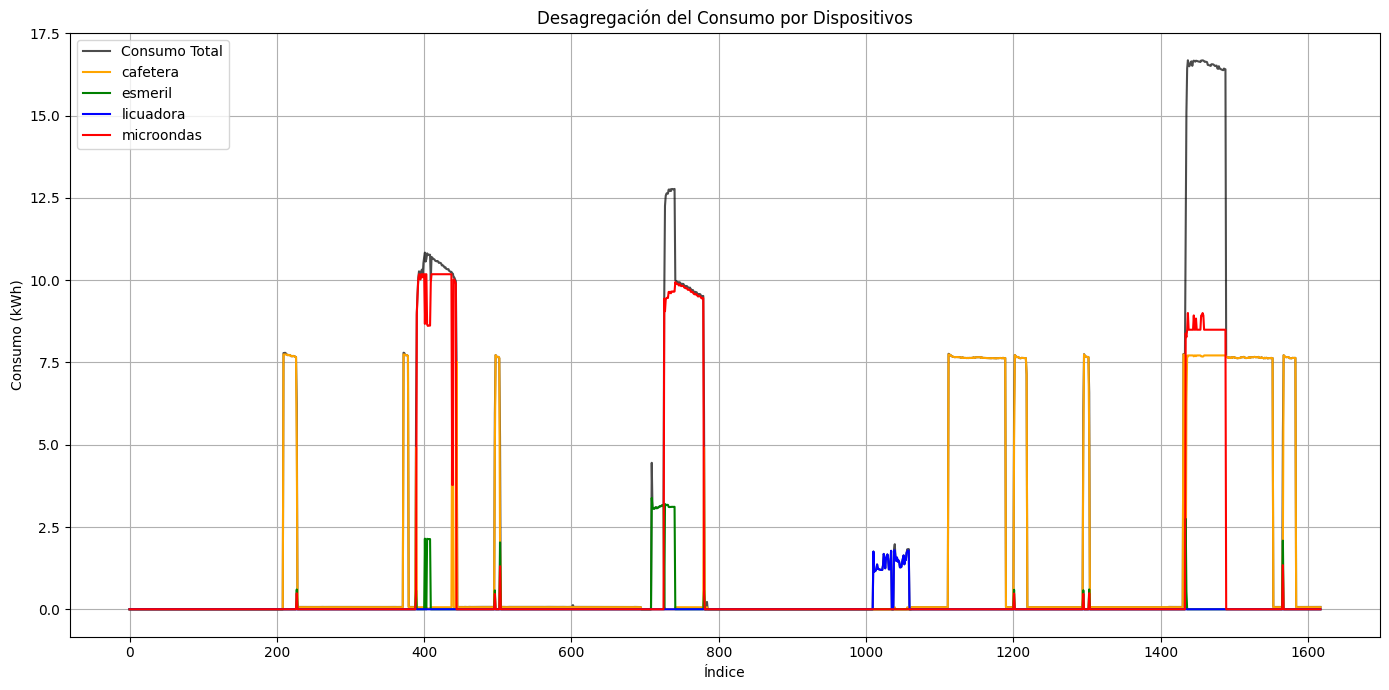

In [3]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt  # Importar matplotlib para graficar

# 1. Cargar los nuevos datos desde un archivo CSV
nuevos_datos = pd.read_csv('corrientesGenerales.csv')  # Asegúrate de que la ruta sea correcta

#'Consumo_T', 'cafetera', 'esmeril', 'licuadora', 'microondas'

# 2. Verificar las columnas de nuevos_datos
print(nuevos_datos.columns)  # Esto te ayudará a entender qué columnas están disponibles

# Desagregar consumo usando la función ajustada
def desagregar_consumo(nuevos_datos):
    # Cargar modelos entrenados para cada área
    
    #'modelo_Tab Secundaria L1.pkl'
    model_cafetera = joblib.load('modelo_cafetera.pkl')
    model_esmeril = joblib.load('modelo_esmeril.pkl')
    model_licuadora = joblib.load('modelo_licuadora.pkl')
    model_microondas = joblib.load('modelo_microondas.pkl')
   
    
    # Realizar predicciones utilizando el consumo total
    pred_cafetera = model_cafetera.predict(nuevos_datos[['Consumo_T']])
    pred_esmeril = model_esmeril.predict(nuevos_datos[['Consumo_T']])
    pred_licuadora = model_licuadora.predict(nuevos_datos[['Consumo_T']])
    pred_microondas = model_microondas.predict(nuevos_datos[['Consumo_T']])

    # Sumar todas las predicciones
    predictions_total = (pred_cafetera + pred_esmeril + pred_licuadora + pred_microondas)
    
    # Ajustar las predicciones para que sumen a 'Consumo_T'
    scaling_factor = np.where(predictions_total > nuevos_datos['Consumo_T'], 
                              nuevos_datos['Consumo_T'] / predictions_total, 1.0)

    # Aplicar el factor de escala a cada predicción
    pred_cafetera_ajustada = pred_cafetera * scaling_factor
    pred_esmeril_ajustada = pred_esmeril * scaling_factor
    pred_licuadora_ajustada = pred_licuadora * scaling_factor
    pred_microondas_ajustada = pred_microondas * scaling_factor

    # Agregar las predicciones ajustadas al DataFrame
    nuevos_datos['cafetera_Pred'] = pred_cafetera_ajustada
    nuevos_datos['esmeril_Pred'] = pred_esmeril_ajustada
    nuevos_datos['licuadora_Pred'] = pred_licuadora_ajustada
    nuevos_datos['microondas_Pred'] = pred_microondas_ajustada
    return nuevos_datos

# Desagregar los nuevos datos
resultados = desagregar_consumo(nuevos_datos)

# 3. Mostrar resultados
print(resultados[['Consumo_T', 'cafetera_Pred', 'esmeril_Pred', 'licuadora_Pred', 
                 'microondas_Pred']])

# Graficar los resultados
plt.figure(figsize=(14, 7))
plt.plot(resultados.index, resultados['Consumo_T'], label='Consumo Total', color='black', alpha=0.7)
plt.plot(resultados.index, resultados['cafetera_Pred'], label='cafetera', color='orange')
plt.plot(resultados.index, resultados['esmeril_Pred'], label='esmeril', color='green')
plt.plot(resultados.index, resultados['licuadora_Pred'], label='licuadora', color='blue')
plt.plot(resultados.index, resultados['microondas_Pred'], label='microondas', color='red')


plt.title('Desagregación del Consumo por Dispositivos')
plt.xlabel('Índice')
plt.ylabel('Consumo (kWh)')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Guardar los resultados en un nuevo archivo CSV
resultados.to_csv('resultados_desagregados_datos_uni.csv', index=False)


Index(['fecha', 'Consumo_T'], dtype='object')
         Consumo_T  cafetera_Pred  esmeril_Pred  licuadora_Pred  \
0     5.877472e-39   5.877472e-39           0.0             0.0   
1     5.877472e-39   5.877472e-39           0.0             0.0   
2     5.877472e-39   5.877472e-39           0.0             0.0   
3     5.877472e-39   5.877472e-39           0.0             0.0   
4     5.877472e-39   5.877472e-39           0.0             0.0   
...            ...            ...           ...             ...   
1613  6.953540e-02   6.355913e-02           0.0             0.0   
1614  6.984913e-02   6.355913e-02           0.0             0.0   
1615  6.939177e-02   6.355913e-02           0.0             0.0   
1616  6.895964e-02   6.355913e-02           0.0             0.0   
1617  7.095884e-02   6.355913e-02           0.0             0.0   

      microondas_Pred  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0  
...  

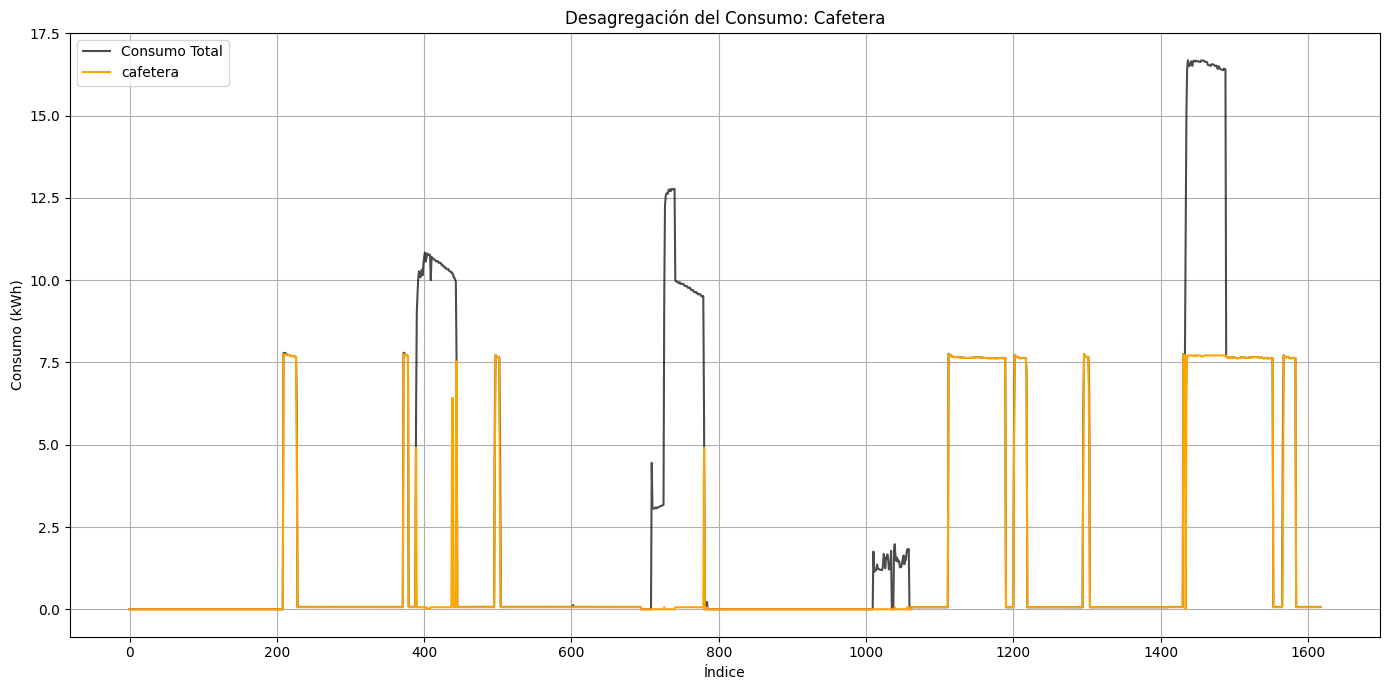

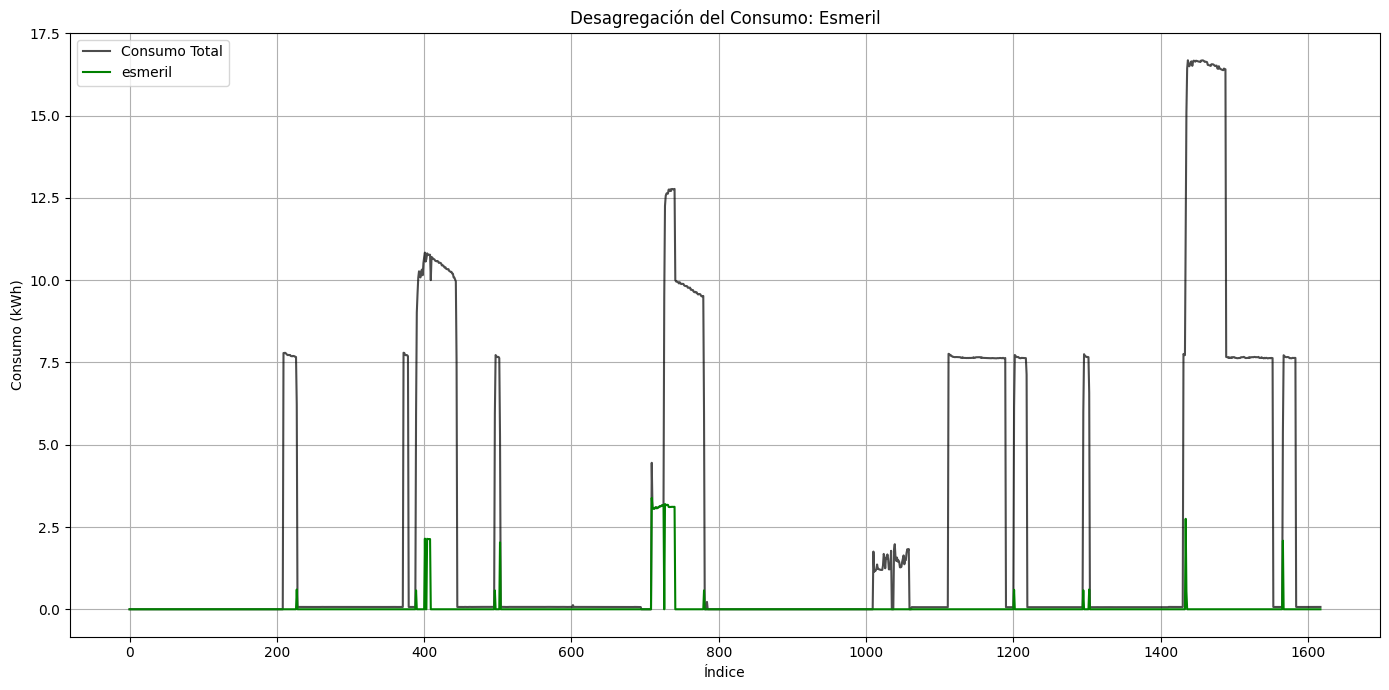

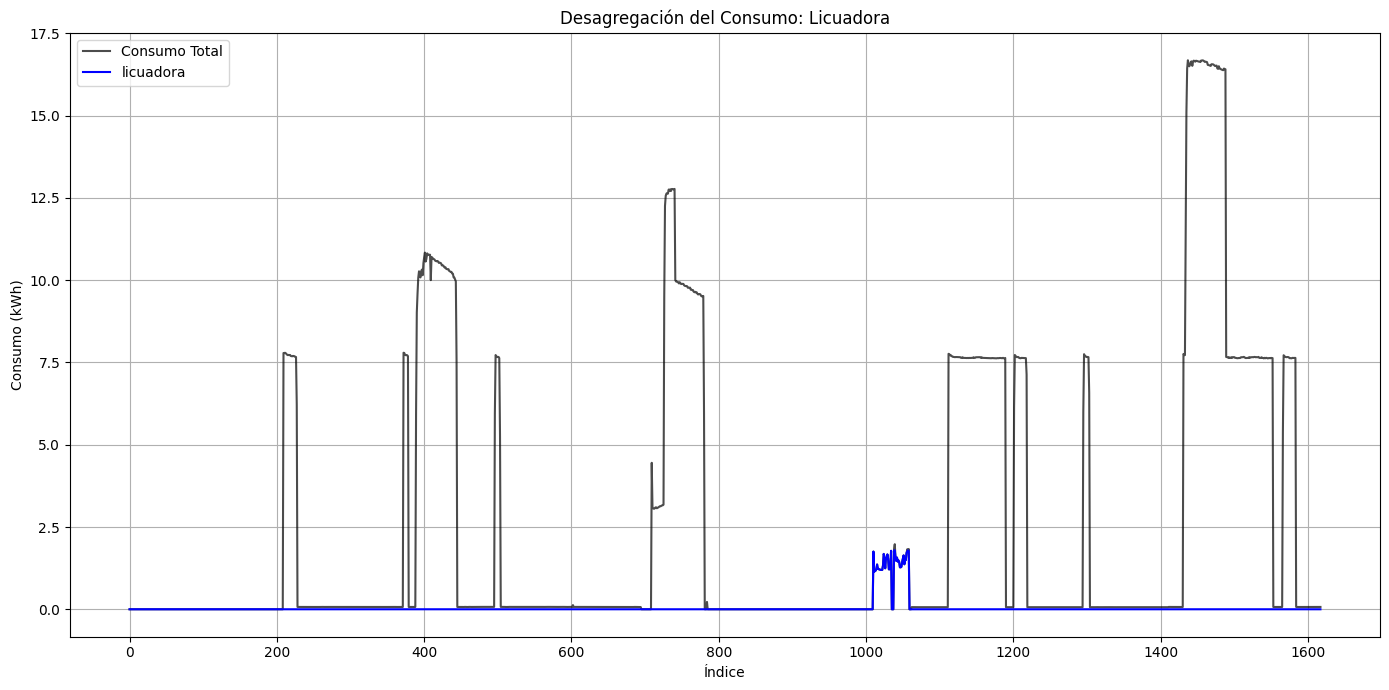

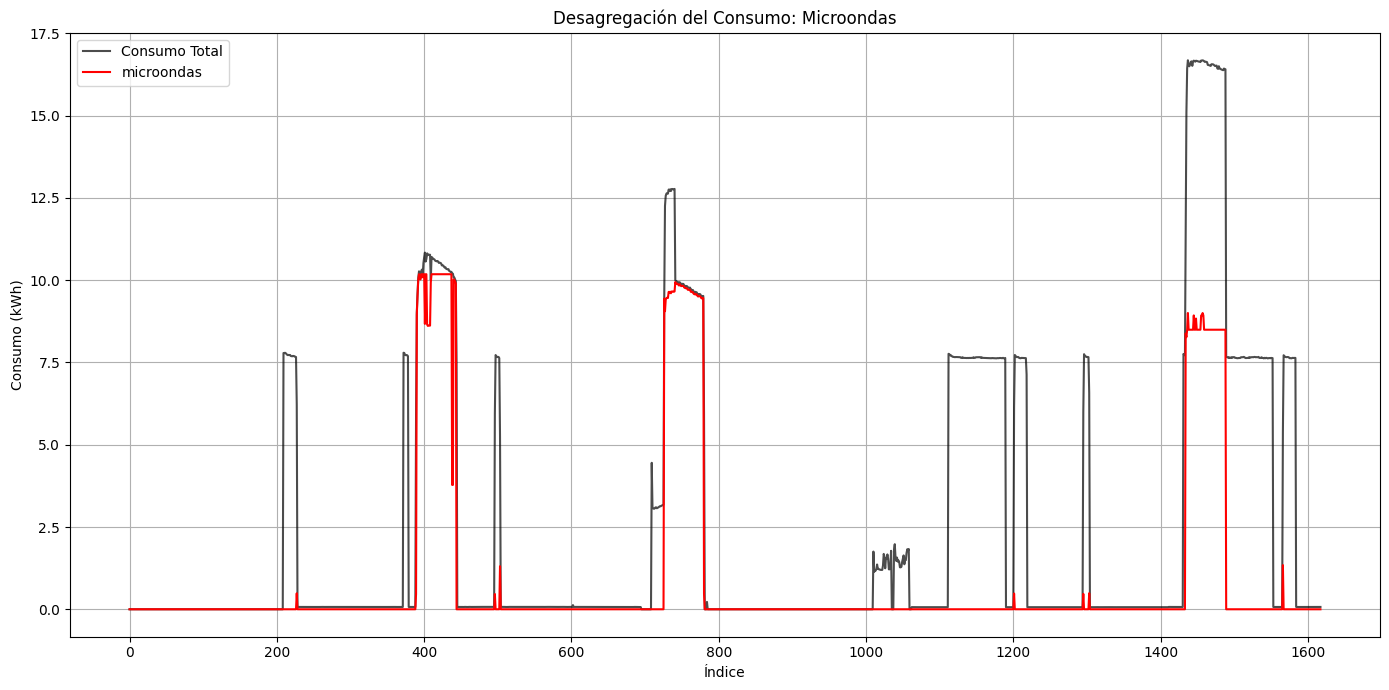

In [4]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt  # Importar matplotlib para graficar

# 1. Cargar los nuevos datos desde un archivo CSV
nuevos_datos = pd.read_csv('corrientesGenerales.csv')  # Asegúrate de que la ruta sea correcta

# 2. Verificar las columnas de nuevos_datos
print(nuevos_datos.columns)  # Esto te ayudará a entender qué columnas están disponibles

# Desagregar consumo usando la función ajustada
def desagregar_consumo(nuevos_datos):
    # Cargar modelos entrenados para cada área
    model_cafetera = joblib.load('modelo_cafetera.pkl')
    model_esmeril = joblib.load('modelo_esmeril.pkl')
    model_licuadora = joblib.load('modelo_licuadora.pkl')
    model_microondas = joblib.load('modelo_microondas.pkl')

    # Realizar predicciones utilizando el consumo total
    pred_cafetera = model_cafetera.predict(nuevos_datos[['Consumo_T']])
    pred_esmeril = model_esmeril.predict(nuevos_datos[['Consumo_T']])
    pred_licuadora = model_licuadora.predict(nuevos_datos[['Consumo_T']])
    pred_microondas = model_microondas.predict(nuevos_datos[['Consumo_T']])

    # Sumar todas las predicciones
    predictions_total = (pred_cafetera + pred_esmeril + pred_licuadora + pred_microondas)
    
    # Ajustar las predicciones para que sumen a 'Consumo_T'
    scaling_factor = np.where(predictions_total > nuevos_datos['Consumo_T'], 
                              nuevos_datos['Consumo_T'] / predictions_total, 1.0)

    # Aplicar el factor de escala a cada predicción
    pred_cafetera_ajustada = pred_cafetera * scaling_factor
    pred_esmeril_ajustada = pred_esmeril * scaling_factor
    pred_licuadora_ajustada = pred_licuadora * scaling_factor
    pred_microondas_ajustada = pred_microondas * scaling_factor

    # Agregar las predicciones ajustadas al DataFrame
    nuevos_datos['cafetera_Pred'] = pred_cafetera_ajustada
    nuevos_datos['esmeril_Pred'] = pred_esmeril_ajustada
    nuevos_datos['licuadora_Pred'] = pred_licuadora_ajustada
    nuevos_datos['microondas_Pred'] = pred_microondas_ajustada
    return nuevos_datos

# Desagregar los nuevos datos
resultados = desagregar_consumo(nuevos_datos)

# 3. Mostrar resultados
print(resultados[['Consumo_T', 'cafetera_Pred', 'esmeril_Pred', 'licuadora_Pred', 
                 'microondas_Pred']])

# Crear gráficas para cada dispositivo
dispositivos = ['cafetera', 'esmeril', 'licuadora', 'microondas']
colores = ['orange', 'green', 'blue', 'red']

for dispositivo, color in zip(dispositivos, colores):
    plt.figure(figsize=(14, 7))
    plt.plot(resultados.index, resultados['Consumo_T'], label='Consumo Total', color='black', alpha=0.7)
    plt.plot(resultados.index, resultados[f'{dispositivo}_Pred'], label=dispositivo, color=color)

    plt.title(f'Desagregación del Consumo: {dispositivo.capitalize()}')
    plt.xlabel('Índice')
    plt.ylabel('Consumo (kWh)')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

# Guardar los resultados en un nuevo archivo CSV
resultados.to_csv('resultados_desagregados_datos_uni.csv', index=False)
